<a href="https://colab.research.google.com/github/amilsiddik/Deep-Learning/blob/main/Amil_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU not found')
print('Fiund GPU at: {}'.format(device_name))

Fiund GPU at: /device:GPU:0


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

from PIL import Image
from numpy import asarray

from tensorflow import keras
from keras.utils import np_utils
from tensorflow.keras import datasets, layers, models

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip =  tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160,160)

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir, shuffle=True, batch_size=BATCH_SIZE, image_size=IMG_SIZE)

68606236/68606236 [==============================] - 4s 0us/step
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


1

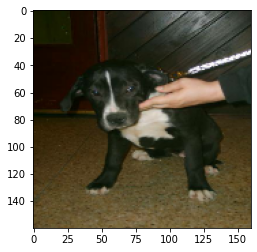

In [4]:
for images, labels in train_dataset.take(1):
  images = images.numpy()
  labels = labels.numpy()

plt.imshow(images[0].astype("uint8"))
labels[0]

In [5]:
#Loading base model pre-trained model MobileNetV2

IMG_SHAPE = IMG_SIZE + (3,)
MobileNetV2 = tf.keras.applications.MobileNetV2(input_shape = IMG_SHAPE, include_top=False, weights='imagenet')

MobileNetV2.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [6]:
inputs = tf.keras.Input(shape=(160,160,3))
x = tf.keras.layers.Rescaling(1./127.5, offset=-1)(inputs)
x = MobileNetV2(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs =  tf.keras.layers.Dense(1,activation='sigmoid')(x)

mymodel=tf.keras.Model(inputs,outputs)

In [8]:
base_learning_rate = 0.0001
mymodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])


In [9]:
#accuracy before train
loss0, accuracy0 = mymodel.evaluate(validation_dataset)

32/32 [==============================] - 11s 47ms/step - loss: 0.8135 - accuracy: 0.4840


In [10]:
#training
initial_epochs =5
history = mymodel.fit(train_dataset, epochs = initial_epochs, validation_data=validation_dataset)

Epoch 1/5
63/63 [==============================] - 7s 69ms/step - loss: 0.6627 - accuracy: 0.6255 - val_loss: 0.5118 - val_accuracy: 0.7660
Epoch 2/5
63/63 [==============================] - 4s 67ms/step - loss: 0.4318 - accuracy: 0.8355 - val_loss: 0.3540 - val_accuracy: 0.9000
Epoch 3/5
63/63 [==============================] - 5s 78ms/step - loss: 0.3098 - accuracy: 0.9130 - val_loss: 0.2668 - val_accuracy: 0.9330
Epoch 4/5
63/63 [==============================] - 5s 73ms/step - loss: 0.2404 - accuracy: 0.9430 - val_loss: 0.2156 - val_accuracy: 0.9480
Epoch 5/5
63/63 [==============================] - 5s 70ms/step - loss: 0.1978 - accuracy: 0.9550 - val_loss: 0.1823 - val_accuracy: 0.9540


In [12]:
MobileNetV2.trainable = True

In [13]:
len(MobileNetV2.layers)

154

In [14]:
for layer in MobileNetV2.layers[:120]:
  layer.trainable = False

In [24]:
mymodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 160, 160, 3)       0         
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,626,177
Non-train

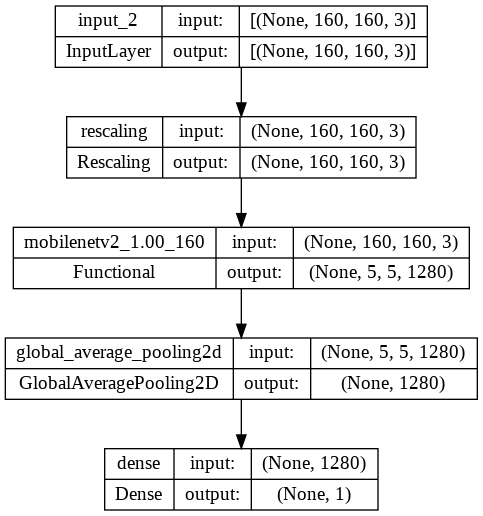

In [25]:
tf.keras.utils.plot_model(mymodel, show_shapes=True)

In [17]:
mymodel.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
                metrics=['accuracy'])

In [28]:
fine_tune_epochs = 50
total_epochs = initial_epochs + fine_tune_epochs
history_fine = mymodel.fit(train_dataset, epochs = total_epochs, validation_data=validation_dataset)

Epoch 1/55
63/63 [==============================] - 6s 93ms/step - loss: 6.2951e-09 - accuracy: 1.0000 - val_loss: 0.0915 - val_accuracy: 0.9890
Epoch 2/55
63/63 [==============================] - 5s 69ms/step - loss: 5.6156e-09 - accuracy: 1.0000 - val_loss: 0.0917 - val_accuracy: 0.9890
Epoch 3/55
63/63 [==============================] - 5s 70ms/step - loss: 5.0321e-09 - accuracy: 1.0000 - val_loss: 0.0924 - val_accuracy: 0.9890
Epoch 4/55
63/63 [==============================] - 5s 78ms/step - loss: 4.4843e-09 - accuracy: 1.0000 - val_loss: 0.0931 - val_accuracy: 0.9890
Epoch 5/55
63/63 [==============================] - 5s 69ms/step - loss: 4.0653e-09 - accuracy: 1.0000 - val_loss: 0.0904 - val_accuracy: 0.9890
Epoch 6/55
63/63 [==============================] - 5s 69ms/step - loss: 3.7713e-09 - accuracy: 1.0000 - val_loss: 0.0931 - val_accuracy: 0.9890
Epoch 7/55
63/63 [==============================] - 5s 69ms/step - loss: 3.4908e-09 - accuracy: 1.0000 - val_loss: 0.0912 - val_ac

**Dicoba di gambar**

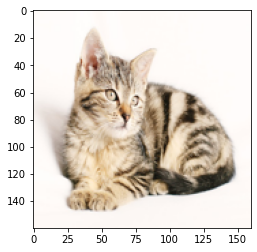

In [19]:
gbr = Image.open('kucing.jpg')
gbr = gbr.convert('RGB')
gbr = gbr.resize((160,160))
gbr = asarray(gbr)

plt.imshow(gbr)

In [20]:
gbr = np.expand_dims(gbr, axis=0)
gbr

array([[[[255, 251, 250],
         [255, 251, 250],
         [255, 251, 248],
         ...,
         [255, 252, 251],
         [255, 252, 251],
         [255, 252, 251]],

        [[255, 251, 250],
         [255, 251, 250],
         [255, 251, 248],
         ...,
         [255, 252, 251],
         [255, 252, 251],
         [255, 252, 251]],

        [[255, 251, 249],
         [255, 251, 250],
         [255, 251, 249],
         ...,
         [255, 252, 251],
         [255, 252, 251],
         [255, 252, 251]],

        ...,

        [[254, 249, 246],
         [254, 249, 246],
         [254, 249, 246],
         ...,
         [254, 249, 246],
         [254, 249, 246],
         [254, 249, 246]],

        [[254, 249, 246],
         [254, 249, 246],
         [254, 249, 246],
         ...,
         [254, 249, 246],
         [254, 249, 246],
         [254, 249, 246]],

        [[254, 249, 246],
         [254, 249, 246],
         [254, 249, 246],
         ...,
         [254, 249, 246],
        

In [22]:
p = mymodel(gbr)
p

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[1.06595844e-13]], dtype=float32)>

In [23]:
p= np.round(p)
p

array([[0.]], dtype=float32)

In [32]:
initial_epochs =50
history = mymodel.fit(train_dataset, epochs = initial_epochs, validation_data=validation_dataset)

Epoch 1/50
63/63 [==============================] - 6s 97ms/step - loss: 9.0976e-10 - accuracy: 1.0000 - val_loss: 0.0998 - val_accuracy: 0.9890
Epoch 2/50
63/63 [==============================] - 5s 72ms/step - loss: 9.0260e-10 - accuracy: 1.0000 - val_loss: 0.1000 - val_accuracy: 0.9890
Epoch 3/50
63/63 [==============================] - 5s 71ms/step - loss: 8.9768e-10 - accuracy: 1.0000 - val_loss: 0.1013 - val_accuracy: 0.9890
Epoch 4/50
63/63 [==============================] - 5s 70ms/step - loss: 8.9915e-10 - accuracy: 1.0000 - val_loss: 0.1012 - val_accuracy: 0.9890
Epoch 5/50
63/63 [==============================] - 5s 71ms/step - loss: 8.8751e-10 - accuracy: 1.0000 - val_loss: 0.1014 - val_accuracy: 0.9890
Epoch 6/50
63/63 [==============================] - 5s 72ms/step - loss: 8.8972e-10 - accuracy: 1.0000 - val_loss: 0.1004 - val_accuracy: 0.9890
Epoch 7/50
63/63 [==============================] - 5s 69ms/step - loss: 8.7378e-10 - accuracy: 1.0000 - val_loss: 0.1017 - val_ac

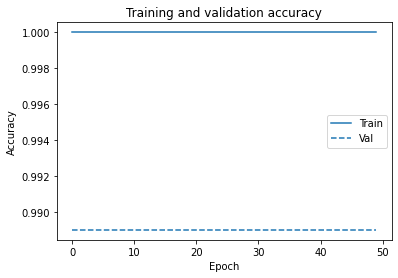

<Figure size 432x288 with 0 Axes>

In [33]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']

epochs   = range(len(acc))

plt.plot(epochs, acc, color=colors[0], label='Train')
plt.plot(epochs, val_acc, color=colors[0], linestyle="--", label='Val')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

Text(0.5, 1.0, 'Training and validation loss')

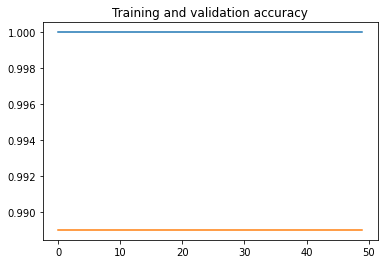

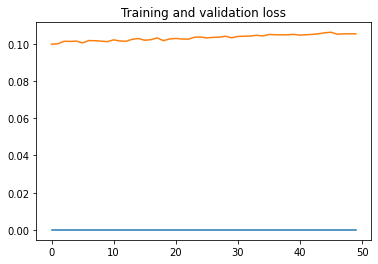

In [34]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy' ]
loss     = history.history['loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc )
plt.plot(epochs, val_acc )
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title('Training and validation loss')

In [36]:
export_dir = 'content/saved_model/1'
tf.saved_model.save(mymodel, export_dir)

In [37]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

In [ ]:
def format_image(image, label):
    image = tf.image.resize(image, IMAGE_SIZE) / 255.0
    return  image, label